# Would You have Survived in Titanic?

This notebook explores the Titanic dataset from Kaggle. 

The goal is to predict if someone would have survived the accident that took place on 15 April 1912 in the North Atlantic Ocean, four days into the ship's maiden voyage from Southampton to New York City. 

We will be trying to build a machine learning based solution going through all the stages of a ML-based SDLC during the process. 

In [1]:
# import relavant libraries
import os
import numpy as np 
import pandas as pd
import pathlib as Path

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# read the dataset into a pandas dataframe
# dataframe makes it easier to visualize and interpret the data

dataset = pd.read_csv('/projects/titanic-survivors/data/titanic_kaggle_train.csv')


In [3]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) Understanding the data

What does the dataset contain?

|Variable	|Definition	   |Key|
| --------- |   ---------  |  ---
|survival 	|Survival 	   |0 = No, 1 = Yes|
|pclass 	|Ticket class  |	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex 	    |Sex 	       |
|Age 	    |Age in years  | 	
|sibsp 	    |# of siblings / spouses aboard the Titanic |	
|parch 	    |# of parents / children aboard the Titanic |	
|ticket     |Ticket number 	|
|fare 	    |Passenger fare |	
|cabin 	    |Cabin number 	|
|embarked   | 	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton|

In [4]:
%matplotlib inline
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# checking the data types & null counts 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# describe() method gives us an understanding of the central tendencies of numerical data 
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# quick way to separate numeric columns
dataset.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
# look at numeric and categorical values separately 
df_num = dataset[['Age','SibSp','Parch','Fare']]
df_cat = dataset[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

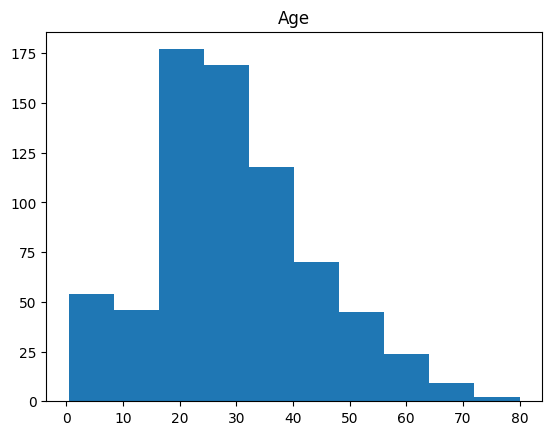

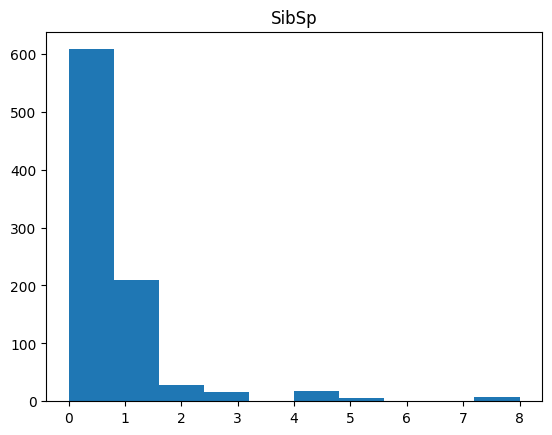

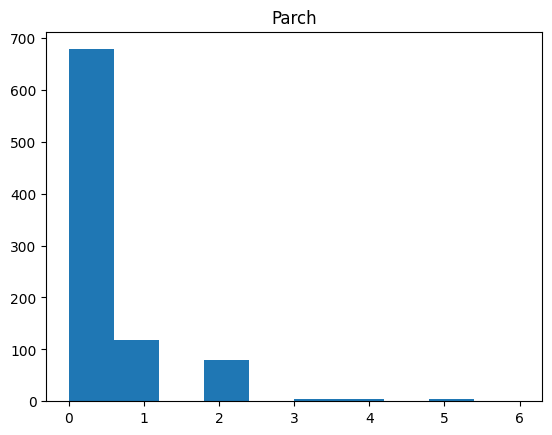

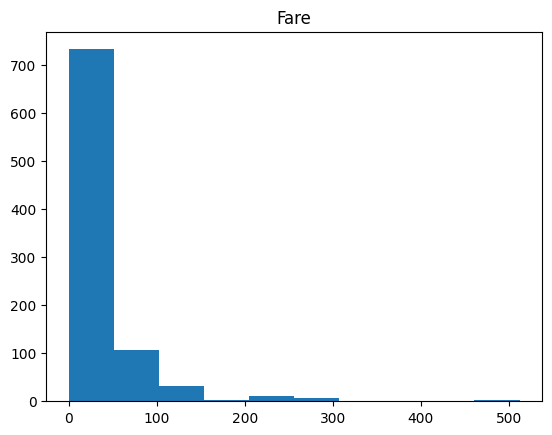

In [9]:
# plot distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [10]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(dataset, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


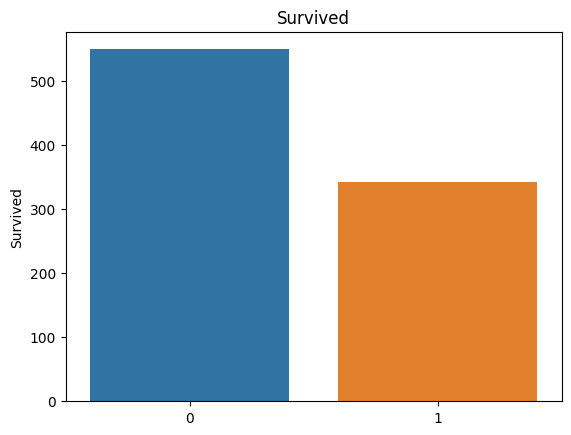

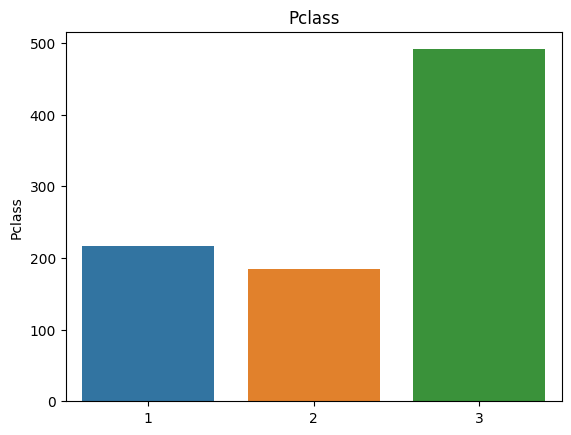

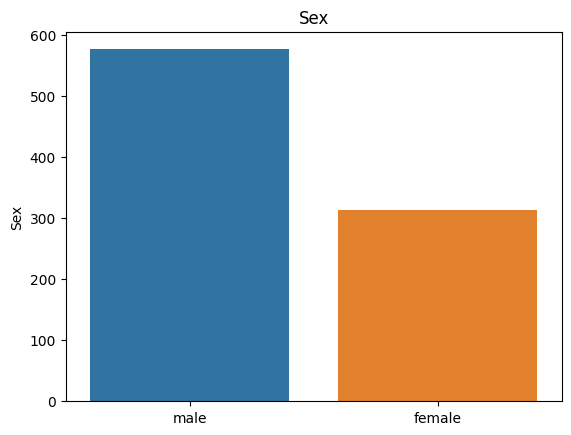

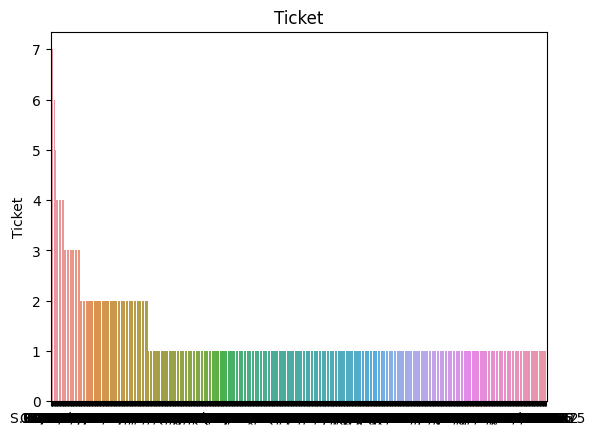

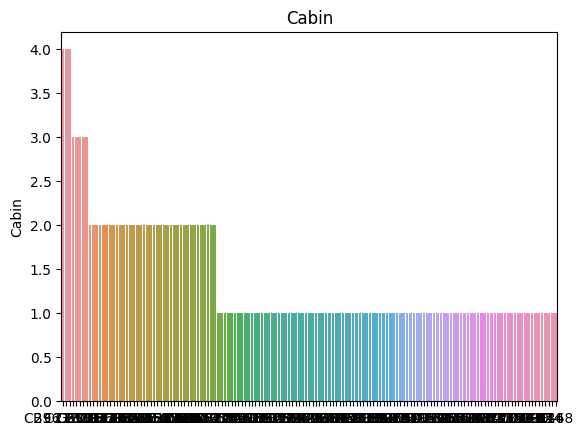

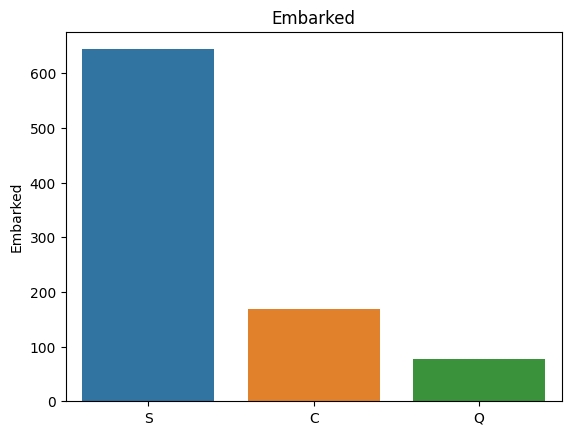

In [11]:
# plot distributions for the categorical variables 
for i in df_cat.columns:
    sns.barplot(
        x=df_cat[i].value_counts().index,
        y=df_cat[i].value_counts(),
    ).set_title(i)
    
    plt.show()

In [12]:
# Comparing survival for p-class, sex and embarked variables 
print(pd.pivot_table(dataset, 
                     index = 'Survived', 
                     columns = 'Pclass', 
                     values = 'Ticket' ,
                     aggfunc ='count'))
print()

print(pd.pivot_table(dataset, 
                     index = 'Survived', 
                     columns = 'Sex', 
                     values = 'Ticket',
                     aggfunc ='count'))
print()

print(pd.pivot_table(dataset, 
                     index = 'Survived', 
                     columns = 'Embarked', 
                     values = 'Ticket',
                     aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## 2) Feature Engineering 

### Unravelling the cabins

- some passengers have multiple cabins assigned to them - what does that mean?
- cabin starts with an alphabet - does that have any relevance?

In [13]:
df_cat.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [14]:
df_cabin = df_cat.Cabin.dropna()
df_cabin.head(100)

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
435        B96 B98
438    C23 C25 C27
445            A34
449           C104
452           C111
Name: Cabin, Length: 100, dtype: object

In [15]:
dataset['cabin_multiple'] = dataset.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [16]:
dataset['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [17]:
pd.pivot_table(dataset, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [18]:
# splitting cabin further based on starting letter

dataset['cabin_alphabet'] = dataset.Cabin.apply(lambda x: str(x)[0])

In [19]:
# comparing surivial rate by cabin
print(dataset.cabin_alphabet.value_counts())
pd.pivot_table(dataset,
               index='Survived',
               columns='cabin_alphabet', 
               values = 'Name', 
               aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_alphabet, dtype: int64


cabin_alphabet,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### Extracting Titles from a name
- Does a person's title relate to survival rates?

In [20]:
dataset.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [21]:
# getting a person's title 
dataset['name_title'] = dataset.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
dataset['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

### Exploing the ticket ID
 - some purely numerical some alphanum - does that have an impact?
 - don't seem to contain any original information that hasn't been covered in cabin and class variables

In [23]:
dataset.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [24]:
# divide into numerical and non-numerical ticket IDs
dataset['ticket_numeric'] = dataset.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

### This is how the data looks after feature engineering:

In [25]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_alphabet,name_title,ticket_numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n,Miss,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C,Mr,1


## 3) Data Preprocessing

- Fill in missing data
- Remove unwanted columns
- Normalize numerical values
- Scale with standard scaler

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  cabin_multiple  891 non-null    int64  
 13  cabin_alphabet  891 non-null    object 
 14  name_title      891 non-null    object 
 15  ticket_numeric  891 non-null    int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 111.5+ KB


 ### Fill in missing Age data  

In [27]:
print("Mean Age    :", dataset.Age.mean())
print("Median Age  :", dataset.Age.median())

Mean Age    : 29.69911764705882
Median Age  : 28.0


In [28]:
# replacing null age values by median
dataset.Age = dataset.Age.fillna(dataset.Age.median())

### Drop null rows in 'Embraked' (only 2)

In [29]:
dataset.dropna(subset=['Embarked'],inplace = True)

### One-Hot-Encoding & Drop Unwanted Columns
- The categorical data has to be made numerical for a machine learning model to learn the patters.
- A popular technique to do this is called One-Hot-Encoding
- We will use pd.get_dummies() method for encoding.

In [30]:
# converting 'Pclass' to string in order to feed it to pd.get_dummies()
dataset.Pclass = dataset.Pclass.astype(str)

# creating dummy variables from categories
# selecting only relevant columns - dropping PassengerId and Name
dummy_dataset = pd.get_dummies(dataset[['Pclass','Sex','Age','SibSp',
                                        'Parch','Fare','Embarked',
                                        'cabin_multiple','cabin_alphabet',
                                        'name_title','ticket_numeric',
                                    ]])

In [31]:
dummy_dataset

,Age,SibSp,Parch,Fare,cabin_multiple,ticket_numeric,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,7.2500,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,71.2833,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,8.0500,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,19.0,0,0,30.0000,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,28.0,1,2,23.4500,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,26.0,0,0,30.0000,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Normalizing Numeric data (Age, SibSp, ParCh, & Fare)
- Distribution for these categories (apart from Age) is skewed. Handful of values have many points, while most other values have few points. 
- We must bring the values to a normal distribution for better model training. 
- Log Scaling is the good technique for such cases.
- We will apply Standardization (Z-Score) that transforms each feature to a normal distribution with a mean of 0 and standard deviation of 1.

In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

dummy_dataset_scaled = dummy_dataset.copy()
dummy_dataset_scaled[['Age','SibSp','Parch','Fare']] = scale.fit_transform(dummy_dataset_scaled[['Age','SibSp','Parch','Fare']])

In [33]:
dummy_dataset_scaled

,Age,SibSp,Parch,Fare,cabin_multiple,ticket_numeric,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.563674,0.431350,-0.474326,-0.500240,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.669217,0.431350,-0.474326,0.788947,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.255451,-0.475199,-0.474326,-0.486650,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.438050,0.431350,-0.474326,0.422861,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.438050,-0.475199,-0.474326,-0.484133,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.178396,-0.475199,-0.474326,-0.384475,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,-0.794841,-0.475199,-0.474326,-0.042213,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,-0.101340,0.431350,2.006119,-0.174084,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,-0.255451,-0.475199,-0.474326,-0.042213,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Splitting dataset into Train and Test

In [34]:
X = dummy_dataset_scaled
y = dataset.Survived

In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4) Building Models
sklearn library offers several off-the-shelf machine learning algorithms which could be used for a classification problem like ours. We will use some of them and compare results.

### Off-the-Shelf Packages
- Naive Bayes
- Logistic Regression
- K-Nearest Neighbours
- Random Forest
- eXtreme Gradient Boosting
- Support Vector Machine

We use Cross Validation with a folding of 5 for initial assessment

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
# Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74825175 0.71830986 0.64084507 0.66197183 0.73239437]
0.7003545750024623


In [62]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8041958  0.83098592 0.78873239 0.81690141 0.88732394]
0.825627893233527


In [63]:
# K-Nearest Neighbours
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82517483 0.83802817 0.78169014 0.80985915 0.84507042]
0.8199645424997538


In [64]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76923077 0.80985915 0.76760563 0.77464789 0.86619718]
0.7975081256771397


In [65]:
# eXtreme Gradient Boosting
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8041958  0.83098592 0.8028169  0.77464789 0.87323944]
0.8171771890081748


In [66]:
# Support Vector Machine
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78321678 0.83098592 0.78873239 0.83098592 0.87323944]
0.8214320890377227


### Support Vector Machine has the Best Cross Validation Score
Training the model on the entire train dataset and testing on test dataset.

In [67]:
from sklearn import metrics

# training the model on entire train set
svc.fit(X_train,y_train)

# calculating accuracy, precission and recall on yet unseen test data
y_pred = svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8426966292134831
Precision: 0.8771929824561403
Recall: 0.704225352112676


In [45]:
# save the model
import pickle

filename = 'svc_model.sav'
# pickle.dump(svc, open(filename, 'wb'))

### Hyperparameter Tuning
There are several hyperparameters in an SVM model that can be tuned. Some of the main ones are: 
- **Kernal** ('sigmoid','rbf'(d), 'linear', 'poly', 'precomputed'): transforms the input data.
- **Regularization** (C): C is the penalty parameter, which represents misclassification or error term. The error term tells the SVM optimization how much error is bearable. The strength of the regularization is inversely proportional to C
- **Gamma** (‘scale’, ‘auto’): Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the gamma, higher the chances of overfitting. 
- **Probability**: Flag to enable probability estimates. This must be enabled prior to calling fit, to disable default 5-fold cross-validation.


### Using GridSearch for Hyperparameter Optimization

In [47]:
from sklearn.model_selection import GridSearchCV 

svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose = True, 
                       n_jobs = -1)

best_clf_svc = clf_svc.fit(X_train,y_train)

print('Best Score: ' + str(best_clf_svc.best_score_))
print('Best Parameters: ' + str(best_clf_svc.best_params_))

Fitting 5 folds for each of 55 candidates, totalling 275 fits
Best Score: 0.8284644932532256
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### Prediction for a single item

In [56]:
y_test.iloc[[29]]

346    1
Name: Survived, dtype: int64

In [57]:
dataset.iloc[[345]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_alphabet,name_title,ticket_numeric
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0,NaN,S,0,n,Miss,1


In [58]:
X_test.iloc[[29]]

,Age,SibSp,Parch,Fare,cabin_multiple,ticket_numeric,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
346,0.823328,-0.475199,-0.474326,-0.384475,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [59]:
load_model = pickle.load(open(filename, 'rb'))
pred = load_model.predict(X_test.iloc[[29]])
print(pred)

[1]


### Advantages of SVMs
- Offers comparitively good accuracy for the fast predection speed.
- Uses less memory.
- Works well with high dimensional space.

### Disadvantages of SVMs
- Not suitable for large datasets.
- Works poorly with overlapping classes.
- Sensitive to the type of kernal used.

## 5) What Next?
- Deep dive into used models to understand hyperparameters and possible improvements.
- Feature engineering on Tickets.
- Try other normalization methods.
- Try neural networks.